> Texto fornecido sob a Creative Commons Attribution license, CC-BY. Todo o código está disponível sob a FSF-approved BSD-3 license.<br>
> (c) Original por Lorena A. Barba, Gilbert F. Forsyth em 2017, traduzido por Felipe N. Schuch em 2020.<br>
> [@LorenaABarba](https://twitter.com/LorenaABarba) - [@fschuch](https://twitter.com/fschuch)

12 passos para Navier-Stokes
======
***

Você deter ter completado os Passos [1](./01_Passo_1.ipynb) e [2](./02_Passo_2.ipynb) antes de continuar. Esse Jupyter notebook é uma continuação dos **12 passos para Navier-Stokes**, um módulo prático aplicado como um curso interativo de Dinâmica dos Fluidos Computacional (CFD, do Inglês *Computational Fluid Dynamics*), por [Prof. Lorena Barba](http://lorenabarba.com). Adaptado e traduzido para português por [Felipe N. Schuch](https://fschuch.github.io/).

Passo 3: Difusão Unidimensional
-----
***

O equação de difusão unidimensional é escrita como:

$$\frac{\partial u(x,t)}{\partial t}= \nu \frac{\partial^2 u(x,t)}{\partial x^2}$$

A primeira coisa que você deve notar é que, diferente das duas equações anteriores que estudamos, essa equação tem uma derivada de segunda ordem. Nós primeiro precisamos ver o que fazemos com isso!

### Discretizando $\frac{\partial ^2 u}{\partial x^2}$

A derivada de segunda ordem pode ser representada geometricamente como a linha que tangencia a curva dada pela derivada primeira. Vamos discretizar a derivada de segunda ordem com um esquema de diferença centrada: uma combinação entre a diferença para frente e a diferença para trás. Considerando a expansão em séries de Taylor de $u_{i+1}$ e $u_{i-1}$ em torno de $u_i$:

$$u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i + \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$$

$$u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i - \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$$

Se adicionarmos as duas expansões, você pode ver que os termos de derivada ímpar cancelam uns aos outros. Se desprezarmos qualquer termos de ordem $O(\Delta x^4)$ ou maior (e realmente, eles são muito pequenos), então podemos rearranjar a soma dessas duas expansões e isolar a derivada de segunda ordem.


$$u_{i+1} + u_{i-1} = 2u_i+\Delta x^2 \frac{\partial ^2 u}{\partial x^2}\bigg|_i + O(\Delta x^4)$$

Então rearranjamos e isolamos $\frac{\partial ^2 u}{\partial x^2}\bigg|_i$, resultando em:

$$\frac{\partial ^2 u_i}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + O(\Delta x^2)$$


### De volta ao Passo 3

Podemos escrever a versão discretizada da equação de difusão unidimensional como:

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}$$

Assim como antes, perceba que temos uma condição inicial e que a única incógnita é $u_{i}^{n+1}$, então, podemos rearranjar a equação para isolar nossa incógnita:

$$u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})$$

A equação discretizada acima nos permite escrever o programa para avançar a solução no tempo. Mas precisamos de uma condição inicial (CI). Vamos continuar com a nossa favorita: a função chapéu (*hat function*). Então, usando $u_0 = 2$ onde $ 0,5 \leq x \leq 1 $, senão $u = 1$, no intervalo $0 \le x \le 2$. Estamos prontos para prosseguir aos números.

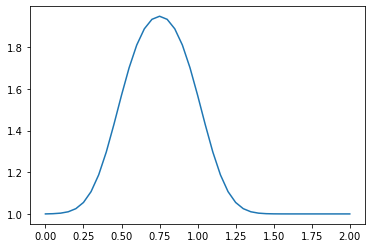

In [1]:
import numpy                  #Carregamos nossa biblioteca preferida
from matplotlib import pyplot #E nos preparamos para produzir gráficos
%matplotlib inline

x = numpy.linspace(0., 2., num = 41) #Coordenada espacial
nt = 20    #Número de passos de tempo que queremos calcular
nu = 0.3   #O valor para viscosidade
sigma = .2 #Sigma é um parâmetro, veremos mais detalhes em breve

nx = x.size
dx = x[1] - x[0]
dt = sigma * dx**2 / nu #dt é calculado em função de sigma, já saberemos o porquê

u = numpy.ones(nx) #Um arranjo numpy com nx elementos e todos iguais a 1
u[(0.5<=x) & (x<=1)] = 2 #Então definimos u = 2 entre 0,5 e 1, nossa CI

un = numpy.ones(nx) #Inicializar o arranjo temporário, para manter a solução no passo de tempo

for n in range(nt): #Laço temporal
    un = u.copy() ##Cópia dos valores de u para un
    for i in range(1, nx - 1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
        
pyplot.plot(x, u);

Pós experimentar mudar os parâmetros no código acima, consulte o material extra ou vá direto para o [Passo 4](./05_Passo_4.ipynb).

Material Complementar
-----
***

Para uma explicação passo à passo sobre a discretização da equação de convecção linear com diferenças finitas (e também os passos seguintes, até o Passo 4), assista **Video Lesson 4** por Prof. Barba no YouTube.

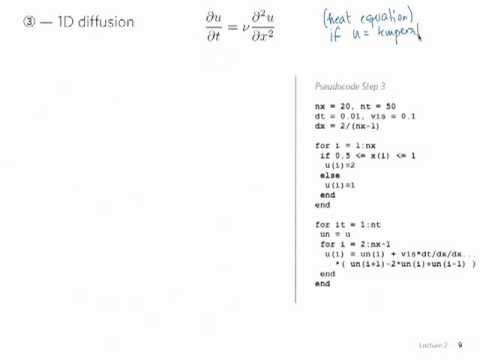

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('y2WaK7_iMRI')

In [3]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> A célula acima executa o estilo para esse notebook. Nós modificamos o estilo encontrado no GitHub de [CamDavidsonPilon](https://github.com/CamDavidsonPilon), [@Cmrn_DP](https://twitter.com/cmrn_dp).